# Homework 4

In [1]:
import numpy as np

import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs
from sympy import Matrix, diff
from sympy import lambdify
from sympy import solve
from sympy import Max
from sympy import Piecewise
from sympy import solveset
from sympy import Eq
from sympy import det

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
plt.ion()

## Question 3.1

In [2]:
(t,
 x_1, 
 x_2,
 v_1,
 v_2,
 T,
 tau,
 a,
 b,
 c) = symbols("""t,
                x_1, 
                x_2,
                v_1,
                v_2,
                T,
                tau,
                a,
                b,
                c""" , real = True)

In [3]:
x_1 = Function('x_1', real=True)(t)
x_2 = Function('x_2', real=True)(t)
v_1 = Function('v_1', real=True)(t)
v_2 = Function('v_2', real=True)(t)

In [4]:
state = Matrix([[x_1, v_1, x_2, v_2]]).T
display(state)

Matrix([
[x_1(t)],
[v_1(t)],
[x_2(t)],
[v_2(t)]])

In [5]:
g = Matrix([[1 / tau * (c - a * Max(0,x_2) - b * v_1) - x_1, 1 / T * (Max(0,x_1) - v_1), 1 / tau * (c - a * Max(0,x_1) - b * v_2) - x_2, 1 / T * (Max(0,x_2) - v_2)]]).T
# g = Matrix([[1 / tau * (c - a * Piecewise((x_2, x_2 > 0), (0, x_2 < 0)) - b * v_1) - x_1, 1 / T * (Piecewise((x_1, x_1 > 0), (0, x_1 < 0)) - v_1), 1 / tau * (c - a * Piecewise((x_1, x_1 > 0), (0, x_1 < 0)) - b * v_2) - x_2, 1 / T * (Piecewise((x_2, x_2 > 0), (0, x_2 < 0)) - v_2)]]).T
display(g)

Matrix([
[-x_1(t) + (-a*Max(0, x_2(t)) - b*v_1(t) + c)/tau],
[                    (-v_1(t) + Max(0, x_1(t)))/T],
[-x_2(t) + (-a*Max(0, x_1(t)) - b*v_2(t) + c)/tau],
[                    (-v_2(t) + Max(0, x_2(t)))/T]])

In [6]:
# fixed_points = solve(g, state)
# display(fixed_points)

In [7]:
Piecewise((x_2, x_2 > 0), (0, x_2 < 0))

Piecewise((x_2(t), x_2(t) > 0), (0, x_2(t) < 0))

In [8]:
Piecewise((x_1, x_1 > 0), (0, x_1 < 0))

Piecewise((x_1(t), x_1(t) > 0), (0, x_1(t) < 0))

In [9]:
jacobian = g.jacobian(state)
display(jacobian)

Matrix([
[                      -1, -b/tau, -a*Heaviside(x_2(t))/tau,      0],
[     Heaviside(x_1(t))/T,   -1/T,                        0,      0],
[-a*Heaviside(x_1(t))/tau,      0,                       -1, -b/tau],
[                       0,      0,      Heaviside(x_2(t))/T,   -1/T]])

In [10]:
A = simplify(jacobian.subs([(x_1, c/tau), (v_1, c/tau), (x_2, c/tau), (v_2, c/tau)]))
display(A)

Matrix([
[                     -1, -b/tau, -a*Heaviside(c/tau)/tau,      0],
[     Heaviside(c/tau)/T,   -1/T,                       0,      0],
[-a*Heaviside(c/tau)/tau,      0,                      -1, -b/tau],
[                      0,      0,      Heaviside(c/tau)/T,   -1/T]])

In [11]:
A_eigen = simplify(A.eigenvals())

In [12]:
A_eigen

{(-T*a*Heaviside(c/tau) - T*tau - tau - sqrt(T**2*a**2*Heaviside(c/tau)**2 + 2*T**2*a*tau*Heaviside(c/tau) + T**2*tau**2 - 2*T*a*tau*Heaviside(c/tau) - 4*T*b*tau*Heaviside(c/tau) - 2*T*tau**2 + tau**2))/(2*T*tau): 1, (-T*a*Heaviside(c/tau) - T*tau - tau + sqrt(T**2*a**2*Heaviside(c/tau)**2 + 2*T**2*a*tau*Heaviside(c/tau) + T**2*tau**2 - 2*T*a*tau*Heaviside(c/tau) - 4*T*b*tau*Heaviside(c/tau) - 2*T*tau**2 + tau**2))/(2*T*tau): 1, (T*a*Heaviside(c/tau) - T*tau - tau - sqrt(T**2*a**2*Heaviside(c/tau)**2 - 2*T**2*a*tau*Heaviside(c/tau) + T**2*tau**2 + 2*T*a*tau*Heaviside(c/tau) - 4*T*b*tau*Heaviside(c/tau) - 2*T*tau**2 + tau**2))/(2*T*tau): 1, (T*a*Heaviside(c/tau) - T*tau - tau + sqrt(T**2*a**2*Heaviside(c/tau)**2 - 2*T**2*a*tau*Heaviside(c/tau) + T**2*tau**2 + 2*T*a*tau*Heaviside(c/tau) - 4*T*b*tau*Heaviside(c/tau) - 2*T*tau**2 + tau**2))/(2*T*tau): 1}

## Question 3.2

In [28]:
def system(t, state, a, b, c, tau, T):
    x1, v1, x2, v2 = state
    dydt = [1/tau * (c - a * max(0, x2) - b * v1) - x1, 1/T * (max(0, x1) - v1), 1/tau * (c - a * max(0, x1) - b * v2) - x2, 1/T * (max(0, x2) - v2)]
    return dydt

In [25]:
# System constants
a_stable = 2.5
a_unstable = 1
b = 2.5
c = 1.5
tau = 0.25
T = 0.5

# Initial condition
x1_0 = 0
v1_0 = 0
x2_0 = 0
v2_0 = 0

dt = 0.001
t_end = 10
time = np.linspace(0,t_end,int(t_end/dt))

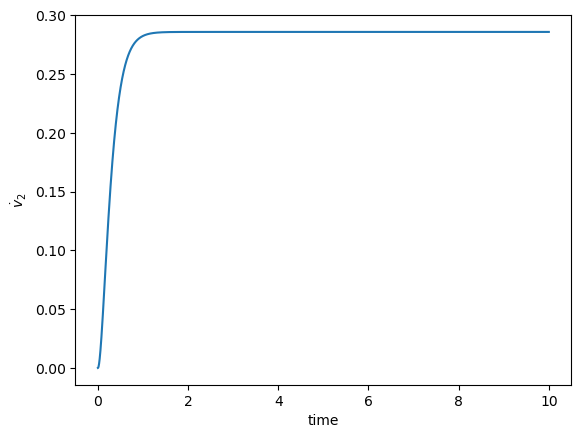

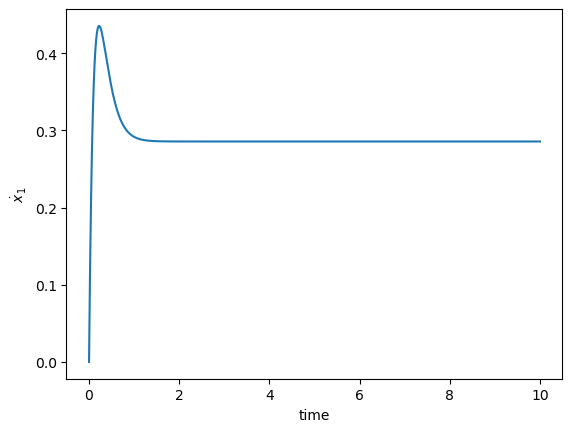

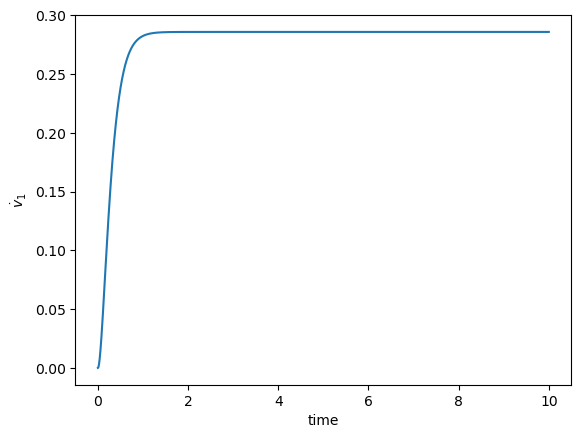

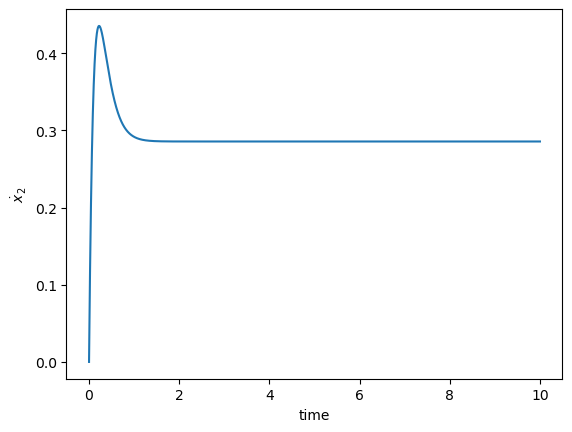

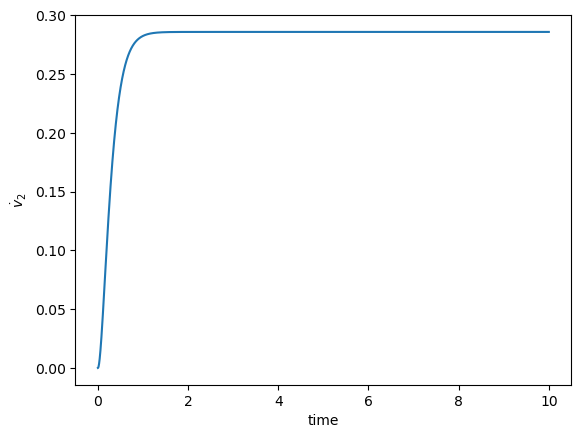

In [26]:
sol_stable = solve_ivp(lambda t, y: system(t, y, a_stable, b, c, tau, T), 
                [0,t_end], [x1_0, v1_0, x2_0, v2_0], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)

plt.figure(1)
# plt.clf()
plt.plot(sol_stable.t, sol_stable.y[0,:])
plt.ylabel('$\dot x_1$')
plt.xlabel('time')
plt.gcf()

plt.figure(2)
# plt.clf()
plt.plot(sol_stable.t, sol_stable.y[1,:])
plt.ylabel('$\dot v_1$')
plt.xlabel('time')
plt.gcf()

plt.figure(3)
# plt.clf()
plt.plot(sol_stable.t, sol_stable.y[2,:])
plt.ylabel('$\dot x_2$')
plt.xlabel('time')
plt.gcf()

plt.figure(4)
# plt.clf()
plt.plot(sol_stable.t, sol_stable.y[3,:])
plt.ylabel('$\dot v_2$')
plt.xlabel('time')
plt.gcf()

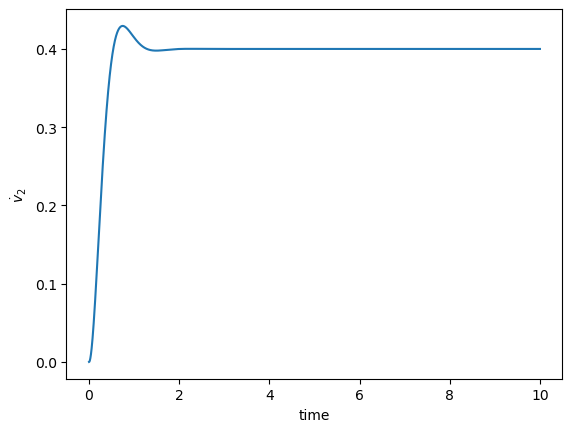

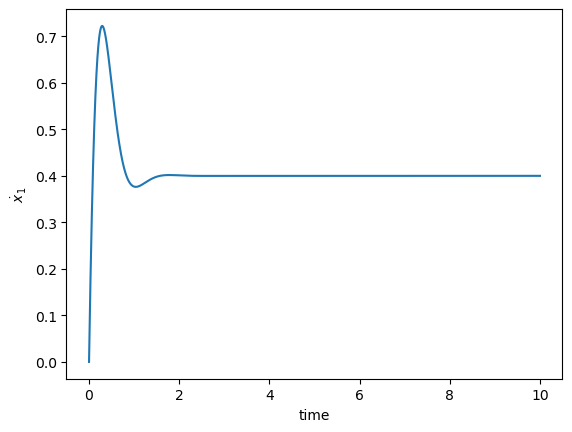

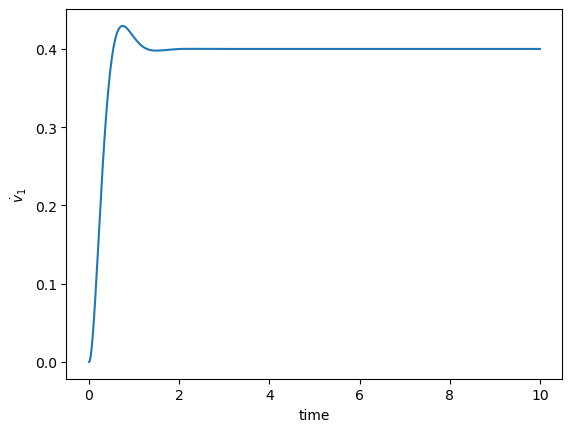

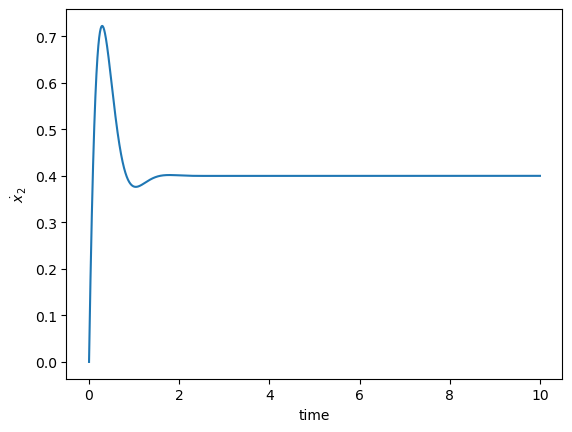

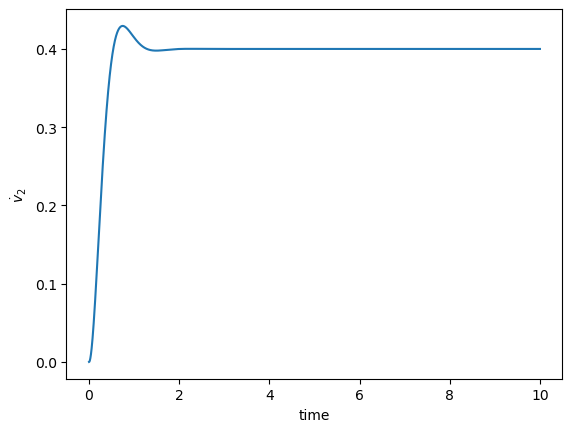

In [27]:
sol_unstable = solve_ivp(lambda t, y: system(t, y, a_unstable, b, c, tau, T), 
                [0,t_end], [x1_0, v1_0, x2_0, v2_0], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)

plt.figure(5)
# plt.clf()
plt.plot(sol_unstable.t, sol_unstable.y[0,:])
plt.ylabel('$\dot x_1$')
plt.xlabel('time')
plt.gcf()

plt.figure(6)
# plt.clf()
plt.plot(sol_unstable.t, sol_unstable.y[1,:])
plt.ylabel('$\dot v_1$')
plt.xlabel('time')
plt.gcf()

plt.figure(7)
# plt.clf()
plt.plot(sol_unstable.t, sol_unstable.y[2,:])
plt.ylabel('$\dot x_2$')
plt.xlabel('time')
plt.gcf()

plt.figure(8)
# plt.clf()
plt.plot(sol_unstable.t, sol_unstable.y[3,:])
plt.ylabel('$\dot v_2$')
plt.xlabel('time')
plt.gcf()